# 탐색적 분석 (EDA)

### 패키지 import

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install xlrd
#!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import plot, show, legend, title, xlabel, ylabel
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

### 경로 설정

In [3]:
os.chdir(r'C:\Users\Administrator\Desktop\구슬기github\global_keyword_trend_innisfree data')

### 데이터 불러오기

In [4]:
googletrend = pd.read_excel('google_trend.xlsx', sheet_name = 'fin')
sales = pd.read_excel('sales.xlsx', sheet_name = 'fin')

In [5]:
sales.shape
sales.sort_values(by=['year_quarter']).head(5)

,year_quarter,year,quarter,sales,sales(-china)
0,201001,2010,1,851,646.76
1,201002,2010,2,703,534.28
2,201003,2010,3,474,360.24
3,201004,2010,4,1310,995.60
4,201101,2011,1,2054,1478.88


## Google Trend 데이터

https://trends.google.co.kr
<br>구글 트렌드 분석을 통해서 온라인 상에서의 검색량이 매출에 미치는 영향력을 확인하였습니다.

### 그래프

In [6]:
# year_month 변수 생성.
x = []
for i in range(googletrend.shape[0]):
    x.append(datetime(googletrend['year'][i],googletrend['month'][i],1))
googletrend['x_year_month'] = x

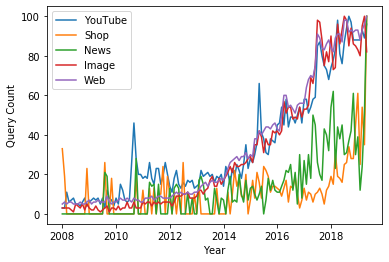

In [7]:
# 월별 노출
plot(googletrend['x_year_month'],googletrend['yt_query'])
plot(googletrend['x_year_month'],googletrend['shop_query'])
plot(googletrend['x_year_month'],googletrend['news_query'])
plot(googletrend['x_year_month'],googletrend['image_query'])
plot(googletrend['x_year_month'],googletrend['web_query'])
legend(['YouTube','Shop','News', 'Image','Web'])
xlabel('Year')
ylabel('Query Count')
plt.show()

시간의 흐름에 따라 검색량과 매출이 모두 증가하는 추세가 나타났습니다.

### 상관관계

In [8]:
colnames = googletrend.columns
colnames

Index(['year_month', 'year', 'month', 'yt_query', 'shop_query', 'news_query',
       'image_query', 'web_query', 'x_year_month'],
      dtype='object')

In [9]:
# 상관관계를 계산하기 위해서는 변화율로 변환
googletrend_small = googletrend[['yt_query','shop_query','news_query','image_query','web_query']]
nRows = googletrend_small.shape[0]
googletrend_small_m = googletrend_small.iloc[0:nRows-1,]
googletrend_small_p = googletrend_small.iloc[1:nRows,] 
googletrend_small_p.index = np.arange(nRows-1)
googletrend_small_rate = np.log((googletrend_small_p+1)/(googletrend_small_m+1))

In [10]:
corr_data = googletrend_small_rate.corr(method = 'pearson')
np.round(corr_data,2)

,yt_query,shop_query,news_query,image_query,web_query
yt_query,1.00,-0.15,0.00,-0.05,0.15
shop_query,-0.15,1.00,0.33,0.16,-0.19
news_query,0.00,0.33,1.00,0.13,0.00
image_query,-0.05,0.16,0.13,1.00,0.24
web_query,0.15,-0.19,0.00,0.24,1.00


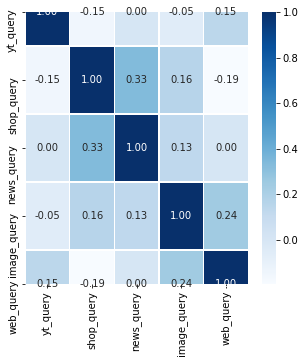

In [11]:
plt.figure(figsize = (5,5))
sns.heatmap(data = corr_data, annot=True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.show()

## Google Trend + 매출데이터

### 데이터 합치기

In [12]:
# 분기로 변환.
quarter = []
for i in range(googletrend.shape[0]):
    if googletrend['month'][i] == 1 :
        quarter.append(1)
    elif googletrend['month'][i] == 2 :
        quarter.append(1)   
    elif googletrend['month'][i] == 3 :
        quarter.append(1)
    elif googletrend['month'][i] == 4 :
        quarter.append(2)
    elif googletrend['month'][i] == 5 :
        quarter.append(2)
    elif googletrend['month'][i] == 6 :
        quarter.append(2)
    elif googletrend['month'][i] == 7 :
        quarter.append(3)
    elif googletrend['month'][i] == 8 :
        quarter.append(3)
    elif googletrend['month'][i] == 9 :
        quarter.append(3)
    elif googletrend['month'][i] == 10 :
        quarter.append(4)
    elif googletrend['month'][i] == 11 :
        quarter.append(4)
    elif googletrend['month'][i] == 12 :
        quarter.append(4)
googletrend['quarter'] = quarter

In [13]:
# 분기별 합계 계산.
google_quarter = googletrend.groupby(['year', 'quarter']).sum()              
google_quarter =google_quarter.drop(columns = ['year_month','month'])           # 불필요 컬럼 삭제.
google_quarter.reset_index(inplace=True)                                        # Multi-index 해제.
google_quarter

,year,quarter,yt_query,shop_query,news_query,image_query,web_query
0,2008,1,17,52,0,9,16
1,2008,2,21,0,0,6,17
2,2008,3,14,0,0,12,16
3,2008,4,18,23,0,12,16
4,2009,1,21,0,0,7,18
5,2009,2,20,0,0,7,19
6,2009,3,23,26,40,9,21
7,2009,4,19,18,0,7,17
8,2010,1,28,0,0,8,21
9,2010,2,25,0,0,12,22


In [14]:
# 데이터 프레임 병합.
google_and_sales = pd.merge(sales, google_quarter,how='inner',on=['year','quarter'])  # Inner join으로 병합.
google_and_sales = google_and_sales.drop(columns=['year_quarter'])
google_and_sales.head(8)

,year,quarter,sales,sales(-china),yt_query,shop_query,news_query,image_query,web_query
0,2010,1,851,646.76,28,0,0,8,21
1,2010,2,703,534.28,25,0,0,12,22
2,2010,3,474,360.24,79,0,0,12,21
3,2010,4,1310,995.60,68,18,28,9,20
4,2011,1,2054,1478.88,55,12,0,17,22
5,2011,2,980,705.60,59,26,45,16,24
6,2011,3,617,444.24,61,20,15,16,26
7,2011,4,857,617.04,65,43,0,18,24


### 분기별 그래프

#### 매출과 노출 추이 (절대 수치)

In [15]:
nRows = google_and_sales.shape[0]
x = []
for i in range(nRows):
    if google_and_sales['quarter'][i] == 1 :
        x.append(datetime(google_and_sales['year'][i],3,1))               # 1분기 => 3월 1일.
    elif google_and_sales['quarter'][i] == 2 :
        x.append(datetime(google_and_sales['year'][i],6,1))               # 2분기 => 6월 1일.
    elif google_and_sales['quarter'][i] == 3 :
        x.append(datetime(google_and_sales['year'][i],9,1))               # 3분기 => 9월 1일.
    elif google_and_sales['quarter'][i] == 4 :
        x.append(datetime(google_and_sales['year'][i],12,1))              # 4분기 => 12월 1일.
google_and_sales['x_year_month'] = x
google_and_sales.head(5)

,year,quarter,sales,sales(-china),yt_query,shop_query,news_query,image_query,web_query,x_year_month
0,2010,1,851,646.76,28,0,0,8,21,2010-03-01
1,2010,2,703,534.28,25,0,0,12,22,2010-06-01
2,2010,3,474,360.24,79,0,0,12,21,2010-09-01
3,2010,4,1310,995.60,68,18,28,9,20,2010-12-01
4,2011,1,2054,1478.88,55,12,0,17,22,2011-03-01


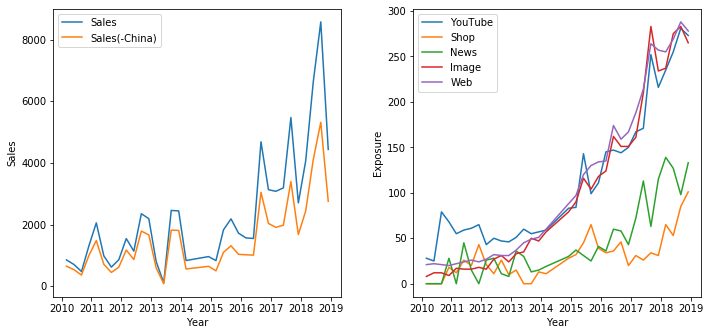

In [16]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.4,1])
axes2 = fig.add_axes([0.5,0,0.4,1])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['sales'])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['sales(-china)'])
axes1.legend(['Sales','Sales(-China)'])
axes1.set_xlabel('Year')
axes1.set_ylabel('Sales')
axes2.plot(google_and_sales['x_year_month'],google_and_sales['yt_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['shop_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['news_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['image_query'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['web_query'])
axes2.legend(['YouTube','Shop','News','Image','Web'])
axes2.set_xlabel('Year')
axes2.set_ylabel('Exposure')
plt.show()

#### 매출과 노출 추이 (최대값 대비 비율)

In [17]:
# 최대값 대비 비율로 변환.
ratio_sales = []
ratio_china = []
ratio_yt = []
ratio_shop =[]
ratio_news = []
ratio_image = []
ratio_web =[]
for i in range(nRows):
    ratio_sales.append((google_and_sales['sales'][i]/max(google_and_sales['sales']))*100)
    ratio_china.append((google_and_sales['sales(-china)'][i]/max(google_and_sales['sales(-china)']))*100)
    ratio_yt.append((google_and_sales['yt_query'][i]/max(google_and_sales['yt_query']))*100)
    ratio_shop.append((google_and_sales['shop_query'][i]/max(google_and_sales['shop_query']))*100)
    ratio_news.append((google_and_sales['news_query'][i]/max(google_and_sales['news_query']))*100)
    ratio_image.append((google_and_sales['image_query'][i]/max(google_and_sales['image_query']))*100)
    ratio_web.append((google_and_sales['web_query'][i]/max(google_and_sales['web_query']))*100)
google_and_sales['ratio_sales'] = ratio_sales
google_and_sales['ratio_sales(-china)'] = ratio_china
google_and_sales['ratio_yt'] = ratio_yt
google_and_sales['ratio_shop'] = ratio_shop
google_and_sales['ratio_news'] = ratio_news
google_and_sales['ratio_image'] = ratio_image
google_and_sales['ratio_web'] = ratio_web
google_and_sales = google_and_sales[google_and_sales['year']!=2019]

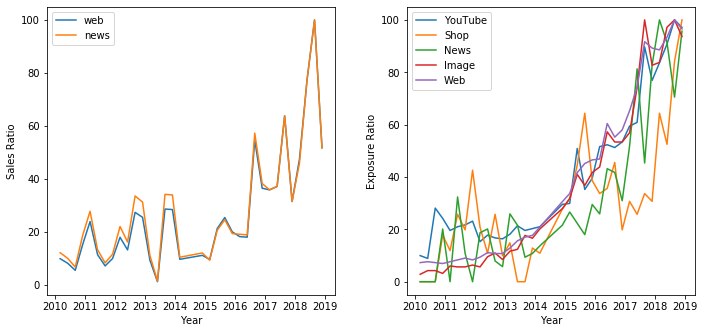

In [18]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.4,1])
axes2 = fig.add_axes([0.5,0,0.4,1])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
axes1.plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales(-china)'])
axes1.legend(['web', 'news','youtube','image','shop','sales','sales(-china)'])
axes1.set_xlabel('Year')
axes1.set_ylabel('Sales Ratio')
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_yt'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_shop'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_news'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_image'])
axes2.plot(google_and_sales['x_year_month'],google_and_sales['ratio_web'])
axes2.legend(['YouTube','Shop','News','Image','Web'])
axes2.set_xlabel('Year')
axes2.set_ylabel('Exposure Ratio')
plt.show()

#### YouTube >> 매출

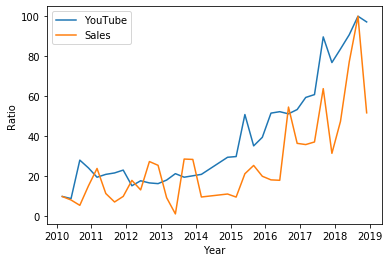

In [19]:
# ratio_sales와 ratio_china는 많이 겹치므로 ratio_china 시각화는 스킵함.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_yt'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['YouTube','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### Shop >> 매출

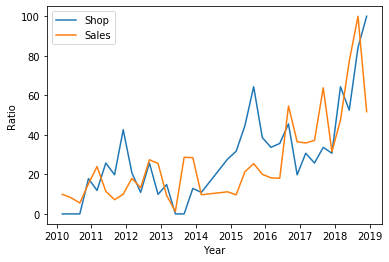

In [20]:
# ratio_sales와 ratio_china는 많이 겹치므로 ratio_china 시각화는 스킵함.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_shop'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['Shop','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### News >> 매출

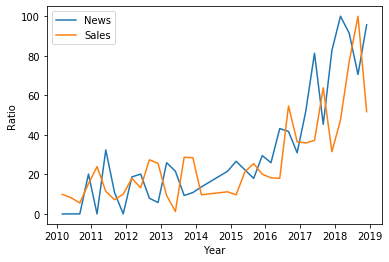

In [21]:
# ratio_sales와 ratio_china는 많이 겹치므로 ratio_china 시각화는 스킵함.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_news'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['News','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### Image >> 매출

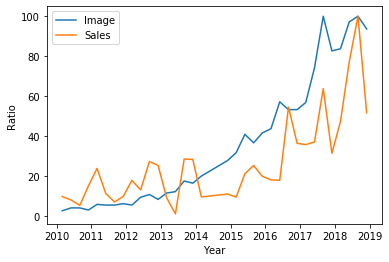

In [22]:
# ratio_sales와 ratio_china는 많이 겹치므로 ratio_china 시각화는 스킵함.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_image'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['Image','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

#### Web >> 매출

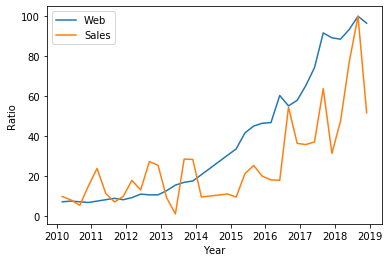

In [23]:
# ratio_sales와 ratio_china는 많이 겹치므로 ratio_china 시각화는 스킵함.
plot(google_and_sales['x_year_month'],google_and_sales['ratio_web'])
plot(google_and_sales['x_year_month'],google_and_sales['ratio_sales'])
legend(['Web','Sales'])
xlabel('Year')
ylabel('Ratio')
plt.show()

### 매출과 노출 사이의 상관관계

In [24]:
google_and_sales.columns

Index(['year', 'quarter', 'sales', 'sales(-china)', 'yt_query', 'shop_query',
       'news_query', 'image_query', 'web_query', 'x_year_month', 'ratio_sales',
       'ratio_sales(-china)', 'ratio_yt', 'ratio_shop', 'ratio_news',
       'ratio_image', 'ratio_web'],
      dtype='object')

In [25]:
# 데이터 간추리기
drop_list=['year','quarter','x_year_month','ratio_sales','ratio_sales(-china)']
drop_list += ['ratio_yt','ratio_shop','ratio_news','ratio_image','ratio_web']
google_and_sales_small=google_and_sales.drop(columns=drop_list)
google_and_sales_small.head(5)

,sales,sales(-china),yt_query,shop_query,news_query,image_query,web_query
0,851,646.76,28,0,0,8,21
1,703,534.28,25,0,0,12,22
2,474,360.24,79,0,0,12,21
3,1310,995.60,68,18,28,9,20
4,2054,1478.88,55,12,0,17,22


In [26]:
# 상관관계를 계산하기 위해서는 변화율이 필요하다.
nRows = google_and_sales_small.shape[0]
google_and_sales_small_m = google_and_sales_small.iloc[0:nRows-1,]
google_and_sales_small_p = google_and_sales_small.iloc[1:nRows,] 
google_and_sales_small_p.index = np.arange(nRows-1)
google_and_sales_small_rate = np.log((google_and_sales_small_p+1)/(google_and_sales_small_m+1))

In [27]:
corr_data = google_and_sales_small_rate.corr(method = 'pearson')
np.round(corr_data,2)

,sales,sales(-china),yt_query,shop_query,news_query,image_query,web_query
sales,1.00,1.00,-0.16,0.37,-0.14,0.13,-0.15
sales(-china),1.00,1.00,-0.15,0.37,-0.13,0.12,-0.16
yt_query,-0.16,-0.15,1.00,-0.04,-0.11,0.15,0.14
shop_query,0.37,0.37,-0.04,1.00,0.24,-0.20,-0.21
news_query,-0.14,-0.13,-0.11,0.24,1.00,-0.43,0.09
image_query,0.13,0.12,0.15,-0.20,-0.43,1.00,0.55
web_query,-0.15,-0.16,0.14,-0.21,0.09,0.55,1.00


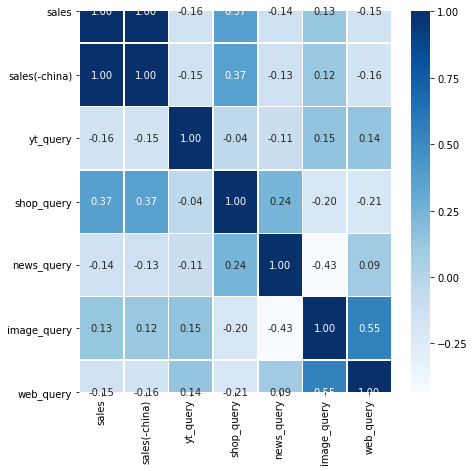

In [28]:
plt.figure(figsize = (7,7))
sns.heatmap(data = corr_data, annot=True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.show()

In [29]:
# 시차 상관계수: YouTube와 Sales
nRows = google_and_sales_small_rate.shape[0]
for d in range(5):
    ser_sales = google_and_sales_small_rate['sales'][d:nRows]
    ser_yt = google_and_sales_small_rate['yt_query'][0:nRows-d]
    corr_val = np.round(ser_sales.corr(ser_yt),2)
    print("Correlation with time difference " + str(d) + " is " + str(corr_val))

Correlation with time difference 0 is -0.16
Correlation with time difference 1 is -0.18
Correlation with time difference 2 is -0.15
Correlation with time difference 3 is -0.13
Correlation with time difference 4 is -0.11


In [30]:
# 2015년도 이후의 상관계수.
google_and_sales_short_rate = google_and_sales_small_rate.iloc[17:,]
corr_data = google_and_sales_short_rate.corr(method = 'pearson')
np.round(corr_data,2)

,sales,sales(-china),yt_query,shop_query,news_query,image_query,web_query
sales,1.00,1.00,0.38,0.46,-0.50,0.33,0.18
sales(-china),1.00,1.00,0.39,0.43,-0.52,0.33,0.16
yt_query,0.38,0.39,1.00,0.05,-0.35,0.66,0.42
shop_query,0.46,0.43,0.05,1.00,-0.08,-0.06,0.09
news_query,-0.50,-0.52,-0.35,-0.08,1.00,-0.11,-0.12
image_query,0.33,0.33,0.66,-0.06,-0.11,1.00,0.81
web_query,0.18,0.16,0.42,0.09,-0.12,0.81,1.00


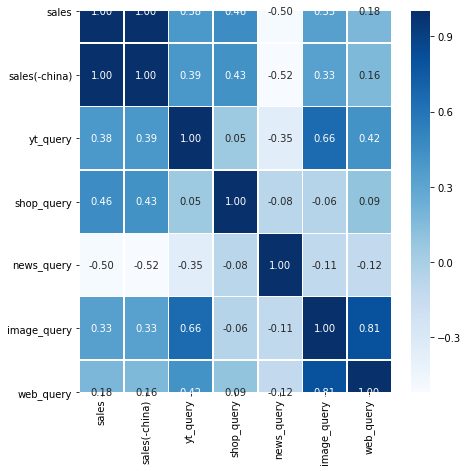

In [31]:
plt.figure(figsize = (7,7))
sns.heatmap(data = corr_data, annot=True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.show()

2015년도 이후 YouTube 조회수와 Sales 사이의 양의 상관성 확인!!!

## YouTube 분석

### 데이터 불러오기

In [32]:
yt = pd.read_csv('youtube_video.csv', header = 'infer', encoding = 'UTF-8')
yt_comment = pd.read_csv('youtube_comments.csv', header = 'infer', encoding = 'UTF-8')

### YouTube 정량적 분석

#### 동영상 수

In [33]:
yt.shape

(661, 8)

#### View (조회수) 전처리

In [34]:
nRows = yt.shape[0]
drop_list = ['조회수','회',',']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt['view'][i] = re.sub(drop_string,'',yt['view'][i])
yt['view'] = pd.to_numeric(yt['view'])

#### Date (게시일) 전처리

In [35]:
# 년 / 월로 쪼개기.
x = []
year = []
month = []
drop_list = ['게시일: ','최초 공개: ','\s',':']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt['date'][i] = re.sub(drop_string,'',yt['date'][i])
    yt['date'][i] = re.sub('실시간스트리밍시작일','',yt['date'][i])
    x = yt['date'][i].split('.')
    year.append(x[0])
    month.append(x[1])
yt['year'] = year
yt['month'] = month
yt['year'] = pd.to_numeric(yt['year'])
yt['month'] = pd.to_numeric(yt['month'])
yt = yt.drop(columns=['date'])

In [36]:
yt.shape
yt.sort_values(by=['year','month']).head(5)

,link,title,view,good,bad,description,number of comment,year,month
53,https://www.youtube.com/watch?v=d3aq49eygaU,Song Hye Kyo Innisfree CF,2936,15,1,Song hye Kyo innisfree CF,댓글 1개,2007,1
1,https://www.youtube.com/watch?v=1xn7rjlOxfc,Celtic Woman - Isle of Inisfree,2134965,4.9천,112,Purchase Info and Tour Dates: http://www.celti...,댓글 512개,2007,5
594,https://www.youtube.com/watch?v=oyfB_fvnJ2g,The Isle Of Innisfree,558583,1.2천,69,The Isle Of Innisfree by The Dublin City Rambl...,댓글 112개,2007,5
156,https://www.youtube.com/watch?v=-A5hbpB94LA,The Isle of Innisfree - Maureen Hegarty,72372,146,2,'The Isle of Innisfree' - Words & Music by Dic...,댓글 93개,2007,11
254,https://www.youtube.com/watch?v=bGPIhN1Z9GA,The Lake Isle Of Innisfree,5173,7,2,Words by William Butler Yeats. Read by our fri...,댓글 1개,2008,4


In [37]:
# 분기로 변환.
quarter = []
a=[1,2,3]
b=[4,5,6]
c=[7,8,9]
for i in range(yt.shape[0]):
    if yt['month'][i] in a :
        quarter.append(1)
    elif yt['month'][i] in b :
        quarter.append(2)
    elif yt['month'][i] in c :
        quarter.append(3)
    else:
        quarter.append(4)
yt['quarter'] = quarter

#### Good (좋아요) 전처리

In [38]:
goodnum = []
for i in range(nRows):
    if yt['good'][i][-1] == '천' :
        goodnum.append(int(float(yt['good'][i][:-1])*1000))
    elif yt['good'][i][-1] == '만' :
        goodnum.append(int(float(yt['good'][i][:-1])*10000))
    elif yt['good'][i] == '좋아요' :
        goodnum.append(0)
    else :
        goodnum.append(int(yt['good'][i]))
yt['good'] = goodnum

#### Bad (싫어요) 전처리

In [39]:
drop_string = '싫어요'
bad = yt['bad']
for i in range(nRows):
    try:
        bad[i] = re.sub(drop_string, '0', bad[i])
        if yt['bad'][i][-1] == '천' :
            bad[i]= (int(float(yt['bad'][i][:-1])*1000))
        elif yt['bad'][i][-1] == '만' :
            bad[i]=  (int(float(yt['bad'][i][:-1])*10000))
    except:
        pass
yt['bad'] = pd.to_numeric(yt['bad'])

#### Good 비율 파생변수

In [40]:
good_ratio = yt['good']/(yt['good']+yt['bad'])
good_ratio = good_ratio.fillna(0)
yt['good_ratio'] = good_ratio

#### Number fo comment (댓글수) 전처리

In [41]:
drop_list = ['댓글','개',',','\s']
drop_string='|'.join(drop_list)
num_com = yt['number of comment']
for i in range(nRows):
    num_com[i] = re.sub(drop_string, '', num_com[i])
yt['number of comment'] = pd.to_numeric(num_com)

#### 다양한 통계치 계산

In [42]:
print("조회수 누적 : " + str(yt['view'].sum()))
print("조회수 평균 : " + str(int(yt['view'].mean())))
print("조회수 중위 : " + str(int(yt['view'].median())))
print('-'*30)
print("댓글수 누적 : " + str(yt['number of comment'].sum()))
print("댓글수 평균 : " + str(int(yt['number of comment'].mean())))
print("댓글수 중위 : " + str(int(yt['number of comment'].median())))
print('-'*30)
print("Good 비율 평균 : " + str(np.round(yt['good_ratio'].mean(),2)))
print("Good 비율 중위 : " + str(np.round(yt['good_ratio'].median(),2)))

조회수 누적 : 105482735
조회수 평균 : 159580
조회수 중위 : 31433
------------------------------
댓글수 누적 : 117856
댓글수 평균 : 178
댓글수 중위 : 41
------------------------------
Good 비율 평균 : 0.92
Good 비율 중위 : 0.97


#### 분기별 동영상 개수

In [43]:
# 별도의 데이터 프레임으로 만든다.
# 카운트가 0이어도 표시.
video_count = []
for i in range(2007,2020):
    for j in range(1,5):
        x = yt.loc[yt['year'] == i][yt['quarter'] == j]['link'].count()
        video_count.append([i , j , x])
video_count = pd.DataFrame(video_count)
video_count.rename(columns = {0:'year',1:'quarter', 2:'video_count'},inplace = True)
video_count.head(10)

,year,quarter,video_count
0,2007,1,1
1,2007,2,2
2,2007,3,0
3,2007,4,1
4,2008,1,0
5,2008,2,2
6,2008,3,2
7,2008,4,1
8,2009,1,1
9,2009,2,3


#### 동영상 개수와 매출 데이터 병합

In [44]:
video_and_sales = pd.merge(sales, video_count, how = 'inner', on=['year','quarter'])
video_and_sales.head(10)

,year_quarter,year,quarter,sales,sales(-china),video_count
0,201001,2010,1,851,646.76,5
1,201002,2010,2,703,534.28,0
2,201003,2010,3,474,360.24,4
3,201004,2010,4,1310,995.60,1
4,201101,2011,1,2054,1478.88,1
5,201102,2011,2,980,705.60,2
6,201103,2011,3,617,444.24,2
7,201104,2011,4,857,617.04,4
8,201201,2012,1,1543,1172.68,2
9,201202,2012,2,1135,862.60,5


### YouTube 정성적 분석

#### 댓글 date 전처리 : 빈칸 및 불필요한 문자 지우기

In [45]:
# date 데이터 전처리
nRows = yt_comment.shape[0]
drop_list = ['전','수정됨','[()]','\s']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt_comment['date'][i] = re.sub(drop_string,'',yt_comment['date'][i])

#### [확인 필요] 댓글 comment date(video date) 전처리 : 빈칸 및 불필요한 문자 지우기

In [46]:
# comment date 데이터 전처리
comment_date = []
drop_list = ['게시일:','최초공개:','실시간스트리밍시작일:','수정됨','[()]','\s']
drop_string='|'.join(drop_list)
for i in range(nRows):
    yt_comment['comment date'][i] = re.sub(drop_string,'',yt_comment['comment date'][i])
comment_date = []
for i in range(nRows):
    yt_comment['comment date'][i] = re.sub(drop_string,'',yt_comment['comment date'][i])

In [47]:
x = []
comment_date = []
for i in range(nRows) :
    x = yt_comment['comment date'][i].split('.')
    comment_date.append(datetime(int(x[0]),int(x[1]),int(x[2])))
yt_comment['comment date'] = comment_date

#### 댓글 date 년/월/일에 따라 날짜 지정

In [48]:
comment_date = []
for i in range(nRows) :
    if yt_comment['date'][i][-1] == '초' :
        comment_date.append(relativedelta(days = 0))
    elif yt_comment['date'][i][-1] == '분' :
        comment_date.append(relativedelta(days = 0))
    elif yt_comment['date'][i][-1] == '간' :
        comment_date.append(relativedelta(days = 0))
    elif yt_comment['date'][i][-1] == '일' :
        comment_date.append(relativedelta(days = int(yt_comment['date'][i][:-1])))
    elif yt_comment['date'][i][-1] == '주' :
        comment_date.append(relativedelta(weeks = int(yt_comment['date'][i][:-1])))
    elif yt_comment['date'][i][-1] == '월' :
        comment_date.append(relativedelta(weeks = int(yt_comment['date'][i][:-2])*4))
    elif yt_comment['date'][i][-1] == '년' :
        comment_date.append(relativedelta(years = int(yt_comment['date'][i][:-1])))
#comment_date

In [49]:
# 시간 차이를 기록함.
collected_date = datetime(2019,5,15)                     # 기준 일자
in_date = []
for i in range(len(comment_date)):
    in_date.append(collected_date - comment_date[i])
yt_comment['date'] = in_date                            # data 변수 대체

In [50]:
# comment date보다 date가 앞인 경우, comment date로 수정
change_date = []
for i in range(nRows) :
    if yt_comment['date'][i] - yt_comment['comment date'][i] < timedelta(days = 0) :
        change_date.append(yt_comment['comment date'][i])
    else :
        change_date.append(yt_comment['date'][i])     
yt_comment['date'] = change_date

#### 년, 월로 변환

In [51]:
x = []
year = []
month = []
for i in range(len(yt_comment['date'])):
    x = str(yt_comment['date'][i]).split('-')
    year.append(x[0])
    month.append(x[1])
yt_comment['year'] = pd.to_numeric(year)            # 수치형으로 변환 포함!
yt_comment['month'] = pd.to_numeric(month)          # 수치형으로 변환 포함!
yt_comment = yt_comment.drop(columns=['date'])                   # 이제는 중복적이므로 제거!

In [52]:
yt_comment.shape
yt_comment.sort_values(by=['year','month'])

,link,comment,comment date,year,month
3621,https://www.youtube.com/watch?v=d3aq49eygaU,i think so too.,2007-01-31,2007,5
417,https://www.youtube.com/watch?v=1xn7rjlOxfc,"Well, I must tell you, that when I have had en...",2007-05-22,2008,5
418,https://www.youtube.com/watch?v=1xn7rjlOxfc,"i love the tune, i listen to this song everyda...",2007-05-22,2008,5
419,https://www.youtube.com/watch?v=1xn7rjlOxfc,As do the rest of us. =/,2007-05-22,2008,5
420,https://www.youtube.com/watch?v=1xn7rjlOxfc,It might be. Perhaps I'll try it one day.,2007-05-22,2008,5
421,https://www.youtube.com/watch?v=1xn7rjlOxfc,BEAUTIFUL,2007-05-22,2008,5
422,https://www.youtube.com/watch?v=1xn7rjlOxfc,But then it always sounds as if a man would be...,2007-05-22,2008,5
423,https://www.youtube.com/watch?v=1xn7rjlOxfc,"Well I am a Contra alto. That´s pretty bad, be...",2007-05-22,2008,5
424,https://www.youtube.com/watch?v=1xn7rjlOxfc,I sometimes listen to this when I go to sleep....,2007-05-22,2008,5
425,https://www.youtube.com/watch?v=1xn7rjlOxfc,"im a countertenor, i can sometimes reach mezzo...",2007-05-22,2008,5


#### 분기로 변환

In [53]:
quarter = []
for i in range(nRows):
    if yt_comment['month'][i] == 1 :
        quarter.append(1)
    elif yt_comment['month'][i] == 2 :
        quarter.append(1)   
    elif yt_comment['month'][i] == 3 :
        quarter.append(1)
    elif yt_comment['month'][i] == 4 :
        quarter.append(2)
    elif yt_comment['month'][i] == 5 :
        quarter.append(2)
    elif yt_comment['month'][i] == 6 :
        quarter.append(2)
    elif yt_comment['month'][i] == 7 :
        quarter.append(3)
    elif yt_comment['month'][i] == 8 :
        quarter.append(3)
    elif yt_comment['month'][i] == 9 :
        quarter.append(3)
    elif yt_comment['month'][i] == 10 :
        quarter.append(4)
    elif yt_comment['month'][i] == 11 :
        quarter.append(4)
    elif yt_comment['month'][i] == 12 :
        quarter.append(4)
yt_comment['quarter'] = quarter

#### 분기별 댓글 개수

In [54]:
# 별도의 데이터 프레임으로 만든다.
# 카운트가 0이어도 표시.
comment_count = []
for i in range(2010,2020):
    for j in range(1,5):
        x = yt_comment.loc[yt_comment['year'] == i][yt_comment['quarter'] == j]['link'].count()
        comment_count.append([i , j , x])
comment_count = pd.DataFrame(comment_count)
comment_count.rename(columns = {0:'year',1:'quarter', 2:'comment_count'},inplace = True)
comment_count.head(10)

,year,quarter,comment_count
0,2010,1,0
1,2010,2,133
2,2010,3,0
3,2010,4,0
4,2011,1,0
5,2011,2,252
6,2011,3,0
7,2011,4,0
8,2012,1,0
9,2012,2,389


#### 동영상 개수, 댓글 개수, 매출 데이터 병합

In [55]:
comment_video_and_sales = pd.merge(video_and_sales, comment_count, how = 'inner', on=['year','quarter'])
comment_video_and_sales.head(10)

,year_quarter,year,quarter,sales,sales(-china),video_count,comment_count
0,201001,2010,1,851,646.76,5,0
1,201002,2010,2,703,534.28,0,133
2,201003,2010,3,474,360.24,4,0
3,201004,2010,4,1310,995.60,1,0
4,201101,2011,1,2054,1478.88,1,0
5,201102,2011,2,980,705.60,2,252
6,201103,2011,3,617,444.24,2,0
7,201104,2011,4,857,617.04,4,0
8,201201,2012,1,1543,1172.68,2,0
9,201202,2012,2,1135,862.60,5,389


## Twitter 데이터 분석

### 데이터 불러오기

In [56]:
tweets = pd.read_csv('tweets.csv', header = 'infer', encoding = 'UTF-8')
tweets.columns = ['tweets','date','id']

In [57]:
tweets

,tweets,date,id
0,20190503\r\n여자친구 GFRIEND / 소원 Sowon & 예린 Yerin...,5월 6일,@Regammamusic
1,190513 Innisfree WEIBO 주정팅\r\n\r\n\r\n\r\n#주정팅...,5월 13일,@ELLE_318
2,고객님+국프님들이 미세먼지속에서도 웃으셨으면 해서더 노력하겠습니다,5월 4일,@ecoinnisfree
3,연인이나 아주 가까운 친구라도 굳이 알 필요가 없는 건 안 말해도 된다,1일,@innisfree54
4,귀여워ㅜㅜ,1일,@innisfree54
5,워너원 굿즈 옹성우 강다니엘 양도\r\n#워너원굿즈\r\n\r\nWANNAONE G...,1일,@young2eyo
6,오빠가 용돈 줌 늦은 생일선물이라구,2일,@innisfree54
7,"오펀 블랙은 스토리,세계관, 캐릭터, 관계 전복, 텐션 등등 다 훌륭하지만 특히나 ...",2일,@innisfree54
8,"실력이 없으면 착하기라도 하던가, 눈치라도 있던가,,,어디서 반 세기도 더 된 이론...",5월 13일,@innisfree54
9,연합동아리에서 나이 많고 자존심 쎈 자칭 ^고학력 남성^인 운영위원이 나한테\r\n...,5월 13일,@innisfree54


### 작성날짜 전처리

#### 분기로 변경

In [58]:
x = []
check = [] 
for i in range(tweets.shape[0]):
    if len(tweets['date'][i])>=11 :
        x = tweets['date'][i]
        check.append(x)
    elif len(tweets['date'][i])>=5:
        x = '2019년 ' + tweets['date'][i]
        check.append(x)
    else :
        x = tweets['date'][i]
        x = str(16- int(tweets['date'][i].replace('일', '')))
        x = '2019년 ' + '5월 ' + x + '일'
        check.append(x)
tweets['date'] = check

In [59]:
tweets

,tweets,date,id
0,20190503\r\n여자친구 GFRIEND / 소원 Sowon & 예린 Yerin...,2019년 5월 6일,@Regammamusic
1,190513 Innisfree WEIBO 주정팅\r\n\r\n\r\n\r\n#주정팅...,2019년 5월 13일,@ELLE_318
2,고객님+국프님들이 미세먼지속에서도 웃으셨으면 해서더 노력하겠습니다,2019년 5월 4일,@ecoinnisfree
3,연인이나 아주 가까운 친구라도 굳이 알 필요가 없는 건 안 말해도 된다,2019년 5월 15일,@innisfree54
4,귀여워ㅜㅜ,2019년 5월 15일,@innisfree54
5,워너원 굿즈 옹성우 강다니엘 양도\r\n#워너원굿즈\r\n\r\nWANNAONE G...,2019년 5월 15일,@young2eyo
6,오빠가 용돈 줌 늦은 생일선물이라구,2019년 5월 14일,@innisfree54
7,"오펀 블랙은 스토리,세계관, 캐릭터, 관계 전복, 텐션 등등 다 훌륭하지만 특히나 ...",2019년 5월 14일,@innisfree54
8,"실력이 없으면 착하기라도 하던가, 눈치라도 있던가,,,어디서 반 세기도 더 된 이론...",2019년 5월 13일,@innisfree54
9,연합동아리에서 나이 많고 자존심 쎈 자칭 ^고학력 남성^인 운영위원이 나한테\r\n...,2019년 5월 13일,@innisfree54


In [60]:
# 날짜 처리
tweets['date'] = tweets['date'].apply(lambda x: x.replace('년 ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('월 ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('일',''))
tweets['date'] = tweets['date'].apply(lambda x: datetime.strptime("/".join(re.findall('\d+', x)), '%Y/%m/%d').strftime('%Y%m%d'))
tweets['year'] = tweets['date'].apply(lambda x: int(x[0:4]))
tweets['month'] = tweets['date'].apply(lambda x: int(x[4:6]))

# 분기 추가
tweets['quarter'] = tweets['month'].apply(lambda x: ((int(x)-1)//3 + 1))

In [61]:
tweets.head(5)

,tweets,date,id,year,month,quarter
0,20190503\r\n여자친구 GFRIEND / 소원 Sowon & 예린 Yerin...,20190506,@Regammamusic,2019,5,2
1,190513 Innisfree WEIBO 주정팅\r\n\r\n\r\n\r\n#주정팅...,20190513,@ELLE_318,2019,5,2
2,고객님+국프님들이 미세먼지속에서도 웃으셨으면 해서더 노력하겠습니다,20190504,@ecoinnisfree,2019,5,2
3,연인이나 아주 가까운 친구라도 굳이 알 필요가 없는 건 안 말해도 된다,20190515,@innisfree54,2019,5,2
4,귀여워ㅜㅜ,20190515,@innisfree54,2019,5,2


In [62]:
tweets_count = []
for i in range(2010,2020):
    for j in range(1,5):
        x = tweets.loc[tweets['year'] == i][tweets['quarter'] == j]['tweets'].count()
        tweets_count.append([i , j , x])
tweets_count = pd.DataFrame(tweets_count)
tweets_count.rename(columns = {0:'year',1:'quarter', 2:'tweets_count'},inplace = True)
tweets_count

,year,quarter,tweets_count
0,2010,1,8
1,2010,2,4
2,2010,3,26
3,2010,4,7
4,2011,1,25
5,2011,2,43
6,2011,3,34
7,2011,4,33
8,2012,1,55
9,2012,2,78


## 상관분석

In [63]:
df1 = pd.merge(video_count, comment_count, how='inner', on=['year','quarter'])
df2 = pd.merge(sales, df1, how='inner', on=['year','quarter'])
df3 = pd.merge(df2, google_quarter, how='inner', on=['year','quarter'])
df4 = pd.merge(df3, tweets_count, how='inner', on=['year', 'quarter'])

df4.to_excel('f_sales.xlsx')
df4.head(5)

,year_quarter,year,quarter,sales,sales(-china),video_count,comment_count,yt_query,shop_query,news_query,image_query,web_query,tweets_count
0,201001,2010,1,851,646.76,5,0,28,0,0,8,21,8
1,201002,2010,2,703,534.28,0,133,25,0,0,12,22,4
2,201003,2010,3,474,360.24,4,0,79,0,0,12,21,26
3,201004,2010,4,1310,995.60,1,0,68,18,28,9,20,7
4,201101,2011,1,2054,1478.88,1,0,55,12,0,17,22,25


In [64]:
# 데이터를 간추린다.
df = df4.drop(columns=['year_quarter','year','quarter','sales(-china)'])
df.head(5)

,sales,video_count,comment_count,yt_query,shop_query,news_query,image_query,web_query,tweets_count
0,851,5,0,28,0,0,8,21,8
1,703,0,133,25,0,0,12,22,4
2,474,4,0,79,0,0,12,21,26
3,1310,1,0,68,18,28,9,20,7
4,2054,1,0,55,12,0,17,22,25


In [65]:
# 데이터를 통계적으로 요약한다.
df.describe()

,sales,video_count,comment_count,yt_query,shop_query,news_query,image_query,web_query,tweets_count
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2302.735294,14.000000,1032.264706,113.647059,29.323529,43.970588,102.088235,110.588235,174.058824
std,1877.547938,14.124983,2632.986509,76.996608,23.850190,40.983726,93.214763,93.178915,191.968580
min,106.000000,0.000000,0.000000,25.000000,0.000000,0.000000,8.000000,20.000000,4.000000
25%,882.500000,3.250000,0.000000,55.500000,12.250000,15.000000,19.500000,28.000000,59.250000
50%,1774.000000,6.500000,0.000000,81.000000,26.000000,30.500000,68.000000,74.000000,105.000000
75%,2984.000000,24.750000,190.750000,149.250000,38.250000,59.500000,158.500000,172.250000,166.500000
max,8577.000000,49.000000,11498.000000,281.000000,101.000000,139.000000,283.000000,288.000000,732.000000


In [66]:
# 상관관계를 계산하기 위해서는 변화율이 필요하다.
nRows = df.shape[0]
df_m = df.iloc[0:nRows-1,]
df_p = df.iloc[1:nRows,] 
df_p.index = np.arange(nRows-1)
df_rate = np.log((df_p+1)/(df_m+1))
df_small_rate = df_rate.iloc[17:,]                    # 2015년도 이후만 가져온다!!!!!

In [67]:
np.round(df_small_rate.corr(),2)

,sales,video_count,comment_count,yt_query,shop_query,news_query,image_query,web_query,tweets_count
sales,1.00,0.31,-0.15,0.38,0.46,-0.50,0.33,0.18,0.47
video_count,0.31,1.00,-0.24,-0.30,0.30,-0.04,-0.15,-0.27,-0.18
comment_count,-0.15,-0.24,1.00,0.20,-0.26,0.42,0.46,0.34,0.19
yt_query,0.38,-0.30,0.20,1.00,0.05,-0.35,0.66,0.42,0.74
shop_query,0.46,0.30,-0.26,0.05,1.00,-0.08,-0.06,0.09,0.09
news_query,-0.50,-0.04,0.42,-0.35,-0.08,1.00,-0.11,-0.12,-0.20
image_query,0.33,-0.15,0.46,0.66,-0.06,-0.11,1.00,0.81,0.75
web_query,0.18,-0.27,0.34,0.42,0.09,-0.12,0.81,1.00,0.52
tweets_count,0.47,-0.18,0.19,0.74,0.09,-0.20,0.75,0.52,1.00
